<a href="https://colab.research.google.com/github/changsksu/IMSE_Data_Science/blob/main/ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This demo shows how to diagnose a time series and fit a ARMA model. Both AR(1) and MA(1) data sets are demonstracted. Both csv files are on Github. 

In [ ]:
import math
import statistics
import numpy as np
import scipy.stats
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#the 2nd read option assume that the data file is rignt under your default google drive directory
# the sep-',' argument in the read statement should be used in some cases if ; does not work
data = pd.read_csv('https://raw.githubusercontent.com/changsksu/K-State-IMSE641/master/AR1.csv', sep=',', na_values=".")
data.head() 

,xt
0,10.321142
1,9.155861
2,7.447477
3,6.770342
4,6.149980


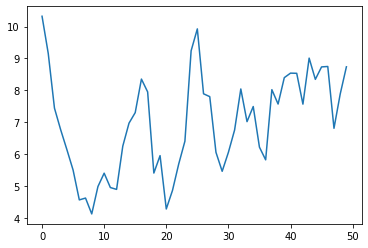

In [ ]:
# is this time series stationary?
plt.plot(data)

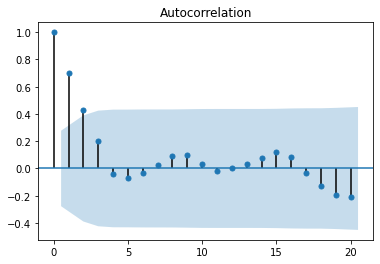

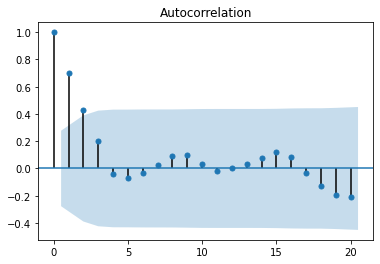

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data, lags=20)

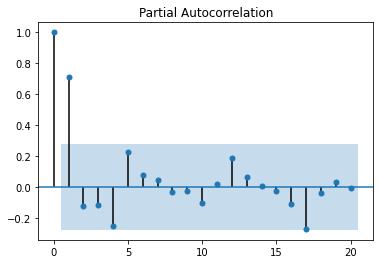

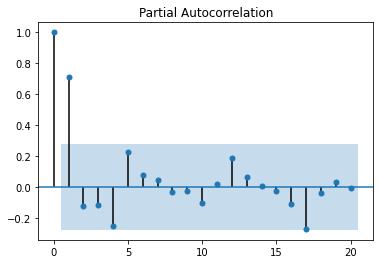

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data, lags=20)

From both acf and pacf plots above, acf shows a sin wave and pacf shows one spike. The most likely ARIMA model is AR(1).

In [ ]:
!pip install statsmodels==0.12.1

                               SARIMAX Results                                
Dep. Variable:                     xt   No. Observations:                   50
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 -73.339
Date:                Wed, 06 Apr 2022   AIC                            152.678
Time:                        16:42:11   BIC                            158.414
Sample:                             0   HQIC                           154.862
                                 - 50                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.2921      0.554     13.158      0.000       6.206       8.378
ar.L1          0.7737      0.105      7.381      0.000       0.568       0.979
sigma2         1.0805      0.231      4.685      0.0

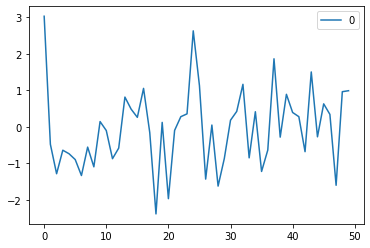

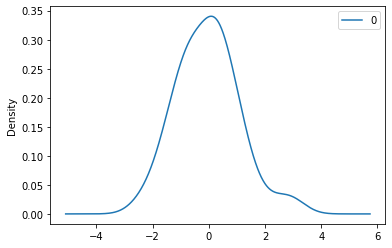

               0
count  50.000000
mean   -0.046872
std     1.101090
min    -2.387571
25%    -0.822985
50%    -0.025525
75%     0.467913
max     3.029070


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot
from pandas import DataFrame
# fit model
model = ARIMA(data, order=(1,0,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

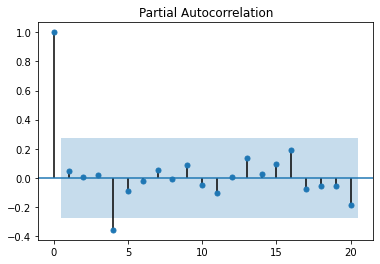

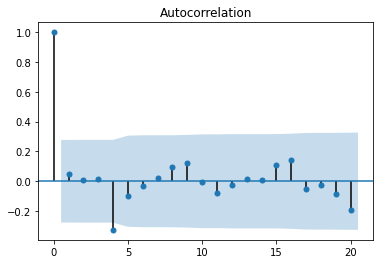

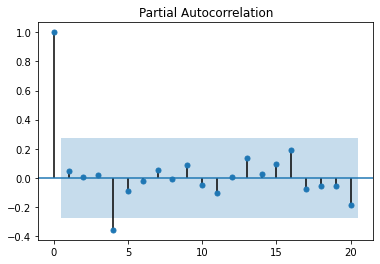

In [ ]:
# ACF & PACF plots on residuals time series
# plt.plot(data3)
plot_acf(residuals, lags=20)
plot_pacf(residuals, lags=20)

Both ACF and PACF show that residuals are pretty much within the boundaries so the AR(1) filter works.

# Now let's examine the ACF and PACF charts for MA1 data

In [ ]:
data2 = pd.read_csv('https://raw.githubusercontent.com/changsksu/K-State-IMSE641/master/MA1.csv', sep=',', na_values=".")
data2.head() 


,xt
0,10.211996
1,10.692098
2,8.645758
3,11.744829
4,9.010084


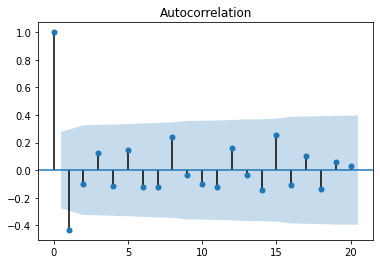

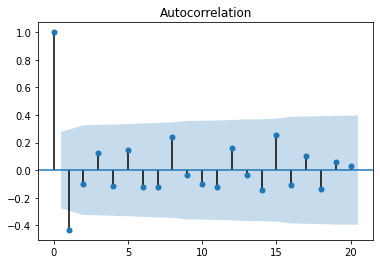

In [ ]:
plot_acf(data2, lags=20)


/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


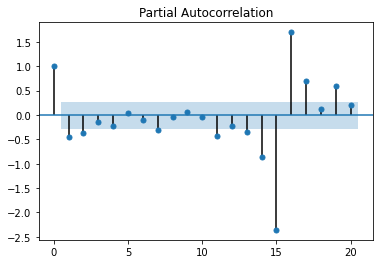

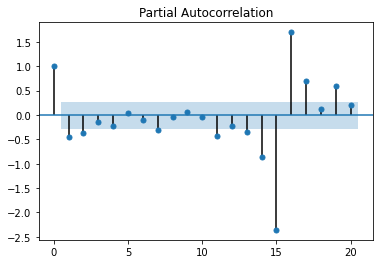

In [ ]:
plot_pacf(data2, lags=20)

                               SARIMAX Results                                
Dep. Variable:                     xt   No. Observations:                   50
Model:                 ARIMA(0, 0, 1)   Log Likelihood                 -78.786
Date:                Wed, 06 Apr 2022   AIC                            163.572
Time:                        16:47:57   BIC                            169.308
Sample:                             0   HQIC                           165.756
                                 - 50                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0252      0.273     25.710      0.000       6.490       7.561
ma.L1          0.6954      0.128      5.438      0.000       0.445       0.946
sigma2         1.3503      0.294      4.595      0.0

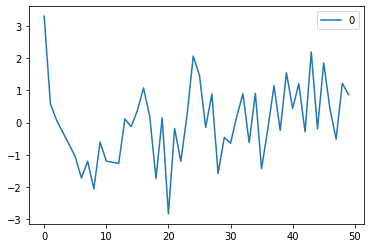

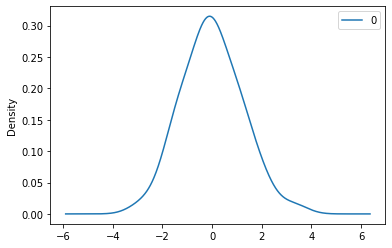

               0
count  50.000000
mean   -0.046872
std     1.101090
min    -2.387571
25%    -0.822985
50%    -0.025525
75%     0.467913
max     3.029070


In [ ]:
# fit MA(1) model
model = ARIMA(data, order=(0,0,1))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals2 = DataFrame(model_fit.resid)
residuals2.plot()
pyplot.show()
# density plot of residuals
residuals2.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

The above ACF and PACF plots show that there is one spike in ACF and most PACF lines are in check. Most likely a AR(1) model will fit this time series well.

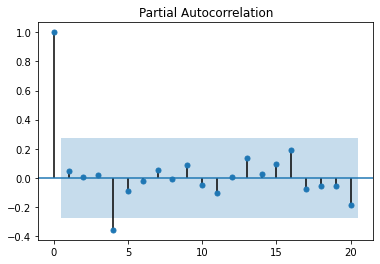

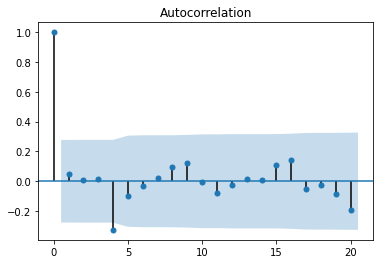

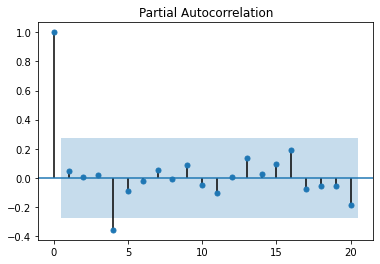

In [ ]:
# ACF & PACF plots on residuals time series
# plt.plot(data3)
plot_acf(residuals, lags=20)
plot_pacf(residuals, lags=20)

The above ACF and PACF plots show that all spikes are small after lag 0 (the largest pike at lag 4). Therefore, the data is independent.